In [5]:
#in the name of GOD

In [6]:
from datetime import datetime
import time
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import re
from IPython.display import clear_output
import pickle

#ploting
pd.set_option('display.max_columns', 500) # number of columns to be displayed
pd.set_option('display.width', 1500)      # max table width to display
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import matplotlib.cm as cm
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 5)})
def color_map_color(value, cmap_name='coolwarm', vmin=0, vmax=10):
    # norm = plt.Normalize(vmin, vmax)
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  # PiYG
    rgb = cmap(norm(abs(value)))[:3]  # will return rgba, we take only first 3 so we get rgb
    color = matplotlib.colors.rgb2hex(rgb)
    return color

import six
import sys
from copy import deepcopy
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator, export_text
from sklearn.metrics import accuracy_score, classification_report,precision_recall_fscore_support

In [7]:
#dont need to run this part cause we have checkpoint for ploting :)
labs=['MN','W','D','H12','H']
Start_range=3
end_range=50

plot_preparation={}
for lab in labs:
    with open('Models\EURUSD-'+lab+'.HGH', 'rb') as f:
        Result = pickle.load(f)
    dfRaw=pd.read_csv('Models\EURUSD-'+lab+'.csv')
    data=dfRaw.drop('label',1)
    label=dfRaw.label
    plot_list_FP=list()
    plot_list_TP=list()
    for max_depth in range(Start_range,end_range):
        es=Result[max_depth-Start_range]
        l=classification_report(label, es.predict(data))
        plot_list_TP.append(int(re.findall("True       \d.\d+", l)[0].split('.')[1])/100)
        plot_list_FP.append(int(re.findall("False       \d.\d+", l)[0].split('.')[1])/100)
    plot_preparation.update({lab:[plot_list_TP,plot_list_FP]})

with open("Models/plot_preparation.HGH", "wb") as fp:
    pickle.dump(plot_preparation, fp)

FileNotFoundError: [Errno 2] No such file or directory: 'Models\\EURUSD-MN.HGH'

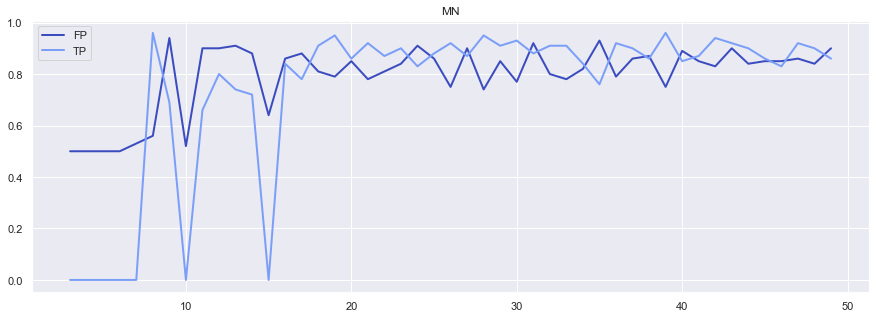

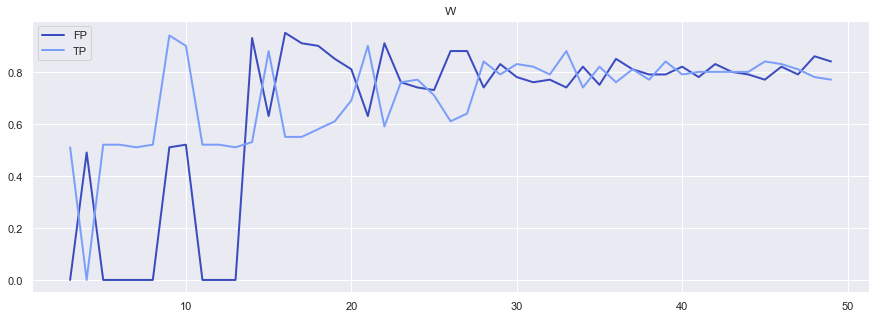

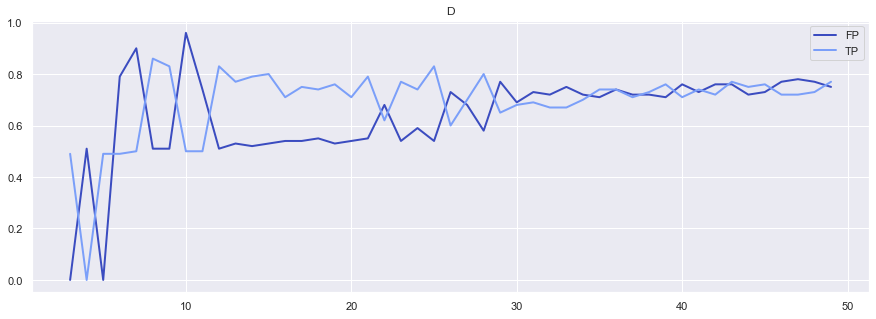

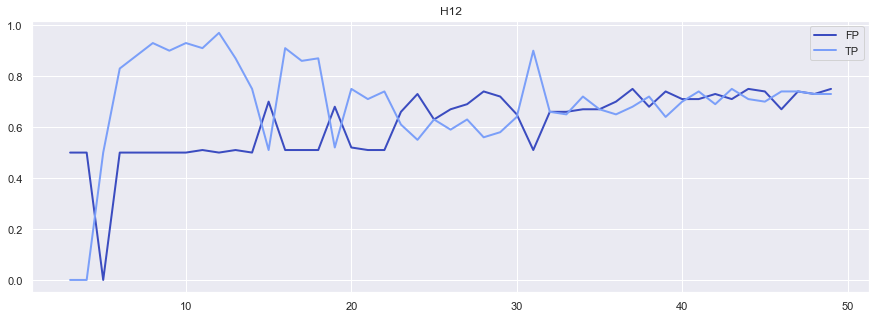

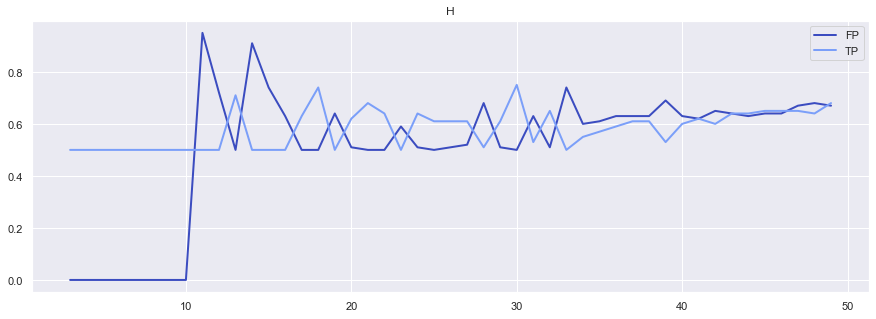

In [10]:
with open('Models-avg_precision/plot_preparation.HGH', 'rb') as f:
        plot_preparation = pickle.load(f)
for lab in plot_preparation :
    fig, ax = plt.subplots()
    for Lambda,chart in enumerate(plot_preparation[lab]):
        ax.plot(range(Start_range,end_range),chart, linestyle='-', linewidth=2,c=color_map_color(Lambda*2),label=["FP","TP"][Lambda])
    ax.set_title(lab)
    ax.legend();
    plt.show() 